In [1]:
## q1) creer la variable 
filename="HMMA238_TP_walidamahjour.ipynb".lower()
print(filename)
## q2) Créer une variable taille_str qui compte le nombre de caractères dans la chaîne de
##caractères filename.
taille_str=len(filename)
print(taille_str)
## q3) reste de la division euclidienne 
ma_graine=taille_str%6
print(ma_graine)

hmma238_tp_walidamahjour.ipynb
30
0


In [4]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])##
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
              + Z[x-1][y] + 0 +Z[x+1][y] \
            + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [5]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

In [6]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

calcul nb_voisin calcul le nombre de voisin de chaque cellule sans prendre en compte la première et la dernière ligne et la première et laa dernière colone 


In [10]:
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                 Z[x][y] = 1
    return Z

In [11]:
N=iteration_jeu(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


In [12]:
import matplotlib.pylab as plt



In [19]:
def iterations_09(Z):
    
    plt.subplots(figsize=(20,11))
    for i in range(10):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(Z, extent=[0,len(Z[0]),0,len(Z)])
        plt.grid(True)
        ax.set_xticks(range(0,len(Z[0]),1))
        plt.title('Itération ' + str(i))
               
        Z = iteration_jeu(Z) 

    plt.show()

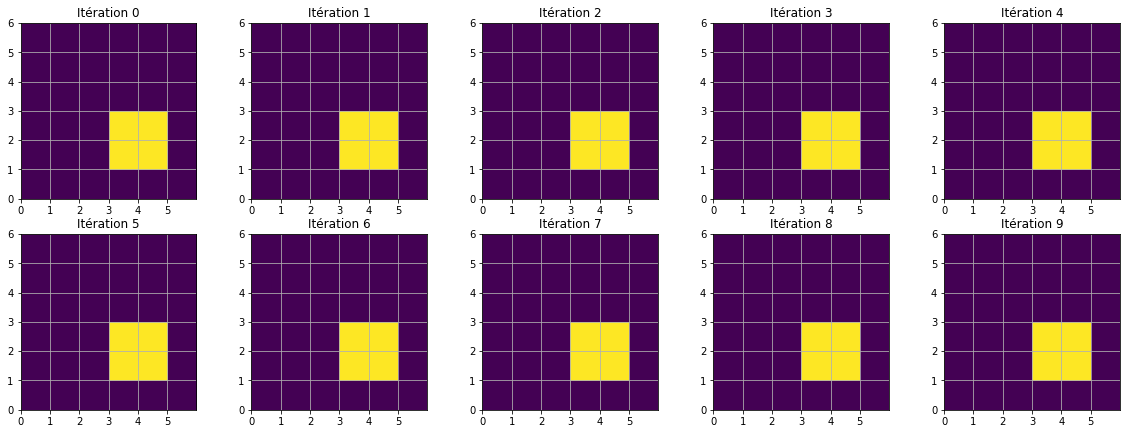

In [20]:
iterations_09(Z)

on remarque qu'à partir de la 7 éme iteration, le nombre de cellule vivantes se stabilise à 4 

In [21]:
import numpy as np 

In [27]:
vect = np.array([0,1,0,0,1,1])
vect
nb_vect = np.zeros(vect.shape)
nb_vect
nb_vect[1:-1] += (vect[:-2] + vect[2:])
nb_vect
## le nb_vect represente le nombre de voisins vivants de chaque cellule, et on a toujours des zeros dans les extremitées(les bornes ne sont pas comptées )


array([0., 0., 1., 1., 1., 0.])

In [63]:

grille = np.asarray(Z)

def calcul_nb_voisins_np(grille):
    T = np.zeros_like(grille)
    for i in range(1, grille.shape[0]-1):
        for j in range(1, grille.shape[1]-1):
            if (grille[i, j] != 0):
                T[i-1,j-1] +=1
                T[i-1,j] += 1
                T[i-1,j+1] += 1
                T[i,j-1] += 1
                T[i,j+1] += 1
                T[i+1,j-1] += 1
                T[i+1,j] += 1
                T[i+1,j+1] += 1
    return T

In [64]:
calcul_nb_voisins_np(grille)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 2, 1],
       [0, 0, 2, 3, 3, 2],
       [0, 0, 2, 3, 3, 2],
       [0, 0, 1, 2, 2, 1]])